# Final Project DSC 530
## Wyatt Rasmussen
## Due: June 5th, 2021

### Topic:
College Football. In this EDA I would like to look at college football stats and see if I can find correlations between certain things and winning. With a rather large data set that tells me turnovers/game, points scored, points against, etc. I am hoping to find areas where we can statistically improve our chances of winning.

In [1]:
%pwd

'/Users/wrasmussen/Desktop/MastersOfDataScience/DSC530/ThinkStats2-wyatt-assignments'

In [2]:
from __future__ import print_function, division

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import numpy as np
import pandas as pd

import random

import thinkstats2
import thinkplot

import statsmodels.formula.api as smf

In [3]:
cfb2020 = pd.read_csv("cfb20.csv")

In [4]:
cfb2020.head()

,Team,Games,Win,Loss,Off.Rank,Off.Plays,Off.Yards,Off.Yards.Play,Off.TDs,Off.Yards.per.Game,...,Average.Time.of.Possession.per.Game,Turnover.Rank,Fumbles.Recovered,Opponents.Intercepted,Turnovers.Gain,Fumbles.Lost,Interceptions.Thrown.y,Turnovers.Lost,Turnover.Margin,Avg.Turnover.Margin.per.Game
0,Air Force (Mountain West),6,3,3,73,373,2336,6.26,19,389.3,...,32:30,58,3,5,8,5,3,8,0,0.00
1,Akron (MAC),6,1,5,121,360,1687,4.69,12,281.2,...,30:35,98,4,2,6,3,6,9,-3,-0.50
2,Alabama (SEC),11,11,0,5,764,5983,7.83,68,543.9,...,30:45,12,10,11,21,7,4,11,10,0.91
3,App State (Sun Belt),12,9,3,26,845,5424,6.42,49,452.0,...,32:18,57,3,15,18,6,11,17,1,0.08
4,Arizona (Pac-12),5,0,5,86,373,1847,4.95,10,369.4,...,28:01,126,1,2,3,5,7,12,-9,-1.80


At this point I realized that I needed to rename my columns so I wouldn't have issues with periods in the names of the variables later on. I renamed the columns in the next line. This became a working list as problems came up.

In [5]:
cfb2020 = cfb2020.rename(columns={'First.Downs': 'FirstDowns', 'Opp.First.Downs': 'OppFirstDowns', 
                             'Penalty.Yards.Per.Game': 'PenaltyYardsPerGame', 'Turnovers.Gain': 'TurnoversGain',
                             'Turnovers.Lost': 'TurnoversLost'})

cfb2020['FirstDownPerGame'] = cfb2020['FirstDowns'] / cfb2020['Games']
cfb2020['OppFirstDownPerGame'] = cfb2020['OppFirstDowns'] / cfb2020['Games']

In [6]:
for col_name in cfb2020.columns: 
    print(col_name)

Team
Games
Win
Loss
Off.Rank
Off.Plays
Off.Yards
Off.Yards.Play
Off.TDs
Off.Yards.per.Game
Def.Rank
Def.Plays
Yards.Allowed
Yards.Play.Allowed
Off.TDs.Allowed
Total.TDs.Allowed
Yards.Per.Game.Allowed
First.Down.Rank
First.Down.Runs
First.Down.Passes
First.Down.Penalties
FirstDowns
First.Down.Def.Rank
Opp.First.Down.Runs
Opp.First.Down.Passes
Opp.First.Down.Penalties
OppFirstDowns
X4th.Down.Rank
X4th.Attempts
X4th.Conversions
X4th.Percent
X4rd.Down.Def.Rank
Opp.4th.Conversion
Opp.4th.Attempt
Opponent.4th.Percent
Kickoff.Return.Rank
Kickoffs.Returned
Kickoff.Return.Yards
Kickoff.Return.Touchdowns
Avg.Yard.per.Kickoff.Return
...40
Kickoff.Return.Def.Rank
Opp.Kickoff.Returns
Kickoff.Touchbacks
Opponent.Kickoff.Return.Yards
Opp.Kickoff.Return.Touchdowns.Allowed
Avg.Yards.per.Kickoff.Return.Allowed
Passing.Off.Rank
Pass.Attempts
Pass.Completions
Interceptions.Thrown.x
Pass.Yards
Pass.Yards.Attempt
Yards.Completion
Pass.Touchdowns
Pass.Yards.Per.Game
Pass.Def.Rank
Opp.Completions.Allowed
Opp.

In the dataset above I plan to use Win, Loss, FirstDowns, OppFirstDowns, PenaltyYardsPerGame, TurnoversGain, TurnoversLost as a starting point for variables I would like to work with. This may expand as I begin to work with the data, but as a starting point this should accomplish what I am hoping to accomplish.

### Describing the Variables

* Win is the amount of wins that a team has in one year
* Loss is the amount of losses that a team has in one year
* FirstDownPerGame is the amount of first downs that a team gets in a per game basis, offense related stat
* OppFirstDownPerGame is the amount of first downs that a team lets up in a per game basis, defense related stat
* PenaltyYardsPerGame is the amount of yards from accepted penalties that a team has enforced on them
* TurnoversGain is the sum of the amount of fumbles recovered and interceptions caught by one team
* TurnoversLost is the sum of the amount of fumbles lost and interceptions thrown by one team

## Histograms

(array([ 9.,  8., 18., 22., 16., 13., 15.,  7.,  9.,  5.,  2.,  3.]),
 array([ 0.        ,  0.91666667,  1.83333333,  2.75      ,  3.66666667,
         4.58333333,  5.5       ,  6.41666667,  7.33333333,  8.25      ,
         9.16666667, 10.08333333, 11.        ]),
 <BarContainer object of 12 artists>)

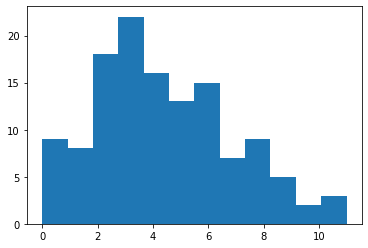

In [7]:
# Histogram of the wins

plt.hist(cfb2020.Win, 12)

(array([ 5., 15., 15., 20., 18., 20., 16., 10.,  2.,  6.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

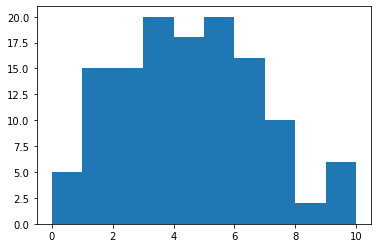

In [8]:
# Histogram of the loss

plt.hist(cfb2020.Loss, 10)

(array([ 2.,  0.,  2.,  1.,  3.,  5., 12.,  8.,  9., 11., 12., 11., 12.,
        14., 11.,  4.,  3.,  4.,  1.,  2.]),
 array([13.33333333, 14.04666667, 14.76      , 15.47333333, 16.18666667,
        16.9       , 17.61333333, 18.32666667, 19.04      , 19.75333333,
        20.46666667, 21.18      , 21.89333333, 22.60666667, 23.32      ,
        24.03333333, 24.74666667, 25.46      , 26.17333333, 26.88666667,
        27.6       ]),
 <BarContainer object of 20 artists>)

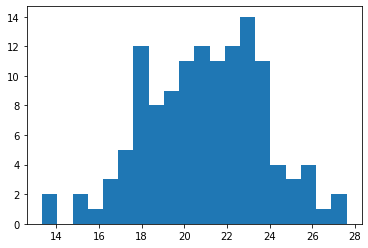

In [9]:
# Histogram of the first downs

plt.hist(cfb2020.FirstDownPerGame, 20)

(array([ 2.,  0.,  2.,  1.,  3.,  5., 12.,  8.,  9., 11., 12., 11., 12.,
        14., 11.,  4.,  3.,  4.,  1.,  2.]),
 array([13.33333333, 14.04666667, 14.76      , 15.47333333, 16.18666667,
        16.9       , 17.61333333, 18.32666667, 19.04      , 19.75333333,
        20.46666667, 21.18      , 21.89333333, 22.60666667, 23.32      ,
        24.03333333, 24.74666667, 25.46      , 26.17333333, 26.88666667,
        27.6       ]),
 <BarContainer object of 20 artists>)

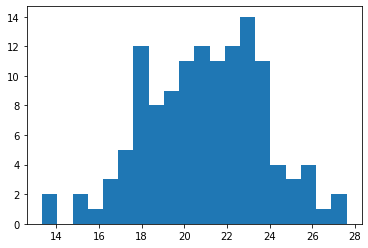

In [10]:
# Histogram of the opponents first downs, I knew this would be identical to the previous one because if you get a
# first down the other team gives one up

plt.hist(cfb2020.OppFirstDownPerGame, 20)

(array([ 1.,  1.,  4., 11., 13., 21., 18., 13., 13.,  7.,  7.,  6.,  7.,
         2.,  3.]),
 array([23.8  , 27.902, 32.004, 36.106, 40.208, 44.31 , 48.412, 52.514,
        56.616, 60.718, 64.82 , 68.922, 73.024, 77.126, 81.228, 85.33 ]),
 <BarContainer object of 15 artists>)

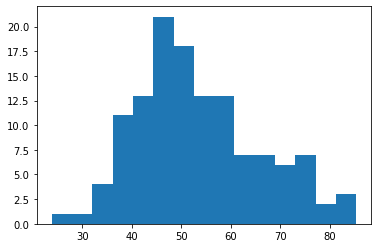

In [11]:
# Histogram of the first downs

plt.hist(cfb2020.PenaltyYardsPerGame, 15)

(array([ 2.,  5.,  3.,  4., 10.,  7.,  9.,  7., 14.,  9., 10.,  5., 14.,
        11.,  3.,  5.,  7.,  0.,  1.,  1.]),
 array([ 1.  ,  2.25,  3.5 ,  4.75,  6.  ,  7.25,  8.5 ,  9.75, 11.  ,
        12.25, 13.5 , 14.75, 16.  , 17.25, 18.5 , 19.75, 21.  , 22.25,
        23.5 , 24.75, 26.  ]),
 <BarContainer object of 20 artists>)

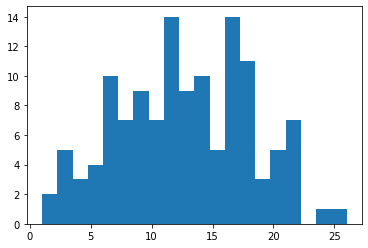

In [12]:
# Histogram of the turnovers gained

plt.hist(cfb2020.TurnoversGain, 20)

(array([ 4.,  7.,  9., 20., 17., 21.,  8., 19., 10.,  6.,  2.,  1.,  2.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 2.  ,  3.85,  5.7 ,  7.55,  9.4 , 11.25, 13.1 , 14.95, 16.8 ,
        18.65, 20.5 , 22.35, 24.2 , 26.05, 27.9 , 29.75, 31.6 , 33.45,
        35.3 , 37.15, 39.  ]),
 <BarContainer object of 20 artists>)

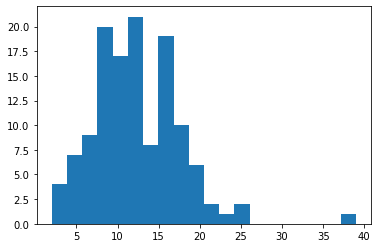

In [13]:
# Histogram of the turnovers lost

plt.hist(cfb2020.TurnoversLost, 20)

### Summary

There doesn't appear to be many outliers in the data besides in the TurnoversLost histogram. This datapoint is over 10 away from other data points which means it probably shouldn't be used in the rest of the analysis done with that variable.

Other than that we see a lot of what was expected. A fairly normal distribution for wins, losses, first downs, and penalties.

## Desciptive Statistics

In [14]:
cfb2020['Win'].describe()

count    127.000000
mean       4.314961
std        2.704202
min        0.000000
25%        2.000000
50%        4.000000
75%        6.000000
max       11.000000
Name: Win, dtype: float64

In [15]:
cfb2020['Loss'].describe()

count    127.000000
mean       4.062992
std        2.329071
min        0.000000
25%        2.000000
50%        4.000000
75%        6.000000
max       10.000000
Name: Loss, dtype: float64

In [16]:
cfb2020['FirstDownPerGame'].describe()

count    127.000000
mean      20.961470
std        2.815070
min       13.333333
25%       18.752525
50%       21.000000
75%       22.950000
max       27.600000
Name: FirstDownPerGame, dtype: float64

In [17]:
cfb2020['OppFirstDownPerGame'].describe()

count    127.000000
mean      20.961470
std        2.815070
min       13.333333
25%       18.752525
50%       21.000000
75%       22.950000
max       27.600000
Name: OppFirstDownPerGame, dtype: float64

In [18]:
cfb2020['PenaltyYardsPerGame'].describe()

count    127.000000
mean      53.532835
std       12.435494
min       23.800000
25%       45.465000
50%       51.330000
75%       60.780000
max       85.330000
Name: PenaltyYardsPerGame, dtype: float64

In [19]:
cfb2020['TurnoversGain'].describe()

count    127.000000
mean      12.598425
std        5.426654
min        1.000000
25%        9.000000
50%       13.000000
75%       17.000000
max       26.000000
Name: TurnoversGain, dtype: float64

In [20]:
cfb2020['TurnoversLost'].describe()

count    127.000000
mean      12.322835
std        5.306303
min        2.000000
25%        9.000000
50%       12.000000
75%       16.000000
max       39.000000
Name: TurnoversLost, dtype: float64

## PMFs

In [21]:
WinningRecord = cfb2020[cfb2020.Win >= cfb2020.Loss]
LosingRecord = cfb2020[cfb2020.Win < cfb2020.Loss]

In [22]:
# checking to see if the data was properly separated

WinningRecord.head()

,Team,Games,Win,Loss,Off.Rank,Off.Plays,Off.Yards,Off.Yards.Play,Off.TDs,Off.Yards.per.Game,...,Fumbles.Recovered,Opponents.Intercepted,TurnoversGain,Fumbles.Lost,Interceptions.Thrown.y,TurnoversLost,Turnover.Margin,Avg.Turnover.Margin.per.Game,FirstDownPerGame,OppFirstDownPerGame
0,Air Force (Mountain West),6,3,3,73,373,2336,6.26,19,389.3,...,3,5,8,5,3,8,0,0.00,17.666667,17.666667
2,Alabama (SEC),11,11,0,5,764,5983,7.83,68,543.9,...,10,11,21,7,4,11,10,0.91,19.636364,19.636364
3,App State (Sun Belt),12,9,3,26,845,5424,6.42,49,452.0,...,3,15,18,6,11,17,1,0.08,18.583333,18.583333
5,Arizona St. (Pac-12),4,2,2,20,252,1834,7.28,21,458.5,...,8,5,13,4,1,5,8,2.00,23.250000,23.250000
8,Army West Point (FBS Independent),11,9,2,112,727,3574,4.92,37,324.9,...,5,13,18,8,5,13,5,0.45,13.363636,13.363636


In [23]:
pmf = thinkstats2.Pmf(cfb2020.Win)
pmf


Pmf({3: 0.1732283464566929, 2: 0.14173228346456693, 4: 0.12598425196850394, 6: 0.11811023622047244, 5: 0.10236220472440945, 0: 0.07086614173228346, 8: 0.07086614173228346, 1: 0.06299212598425197, 7: 0.05511811023622047, 9: 0.03937007874015748, 11: 0.023622047244094488, 10: 0.015748031496062992})

In [61]:
pmf = thinkstats2.Pmf(WinningRecord.TurnoversGain, label='WinningRecord')
pmf1 = thinkstats2.Pmf(LosingRecord.TurnoversGain, label='LosingRecord')
pmf
pmf1

Pmf({12: 0.0847457627118644, 9: 0.0847457627118644, 11: 0.0847457627118644, 10: 0.0847457627118644, 6: 0.06779661016949153, 14: 0.06779661016949153, 7: 0.05084745762711865, 8: 0.05084745762711865, 5: 0.05084745762711865, 4: 0.05084745762711865, 3: 0.05084745762711865, 13: 0.05084745762711865, 18: 0.05084745762711865, 15: 0.03389830508474576, 20: 0.03389830508474576, 17: 0.03389830508474576, 19: 0.01694915254237288, 1: 0.01694915254237288, 16: 0.01694915254237288, 24: 0.01694915254237288}, 'LosingRecord')

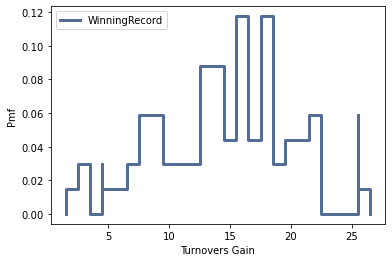

In [63]:
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Turnovers Gain', ylabel='Pmf')

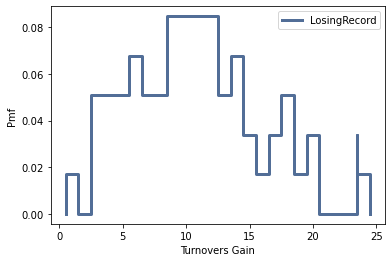

In [64]:
thinkplot.Pmf(pmf1)
thinkplot.Config(xlabel='Turnovers Gain', ylabel='Pmf')

## CDFs

In [26]:
WinningRecord = cfb2020[cfb2020.Win >= cfb2020.Loss]
LosingRecord = cfb2020[cfb2020.Win < cfb2020.Loss]

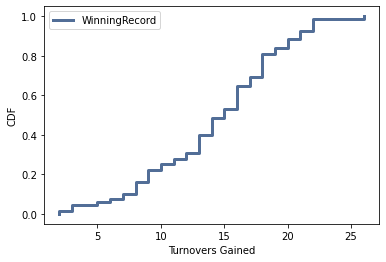

<Figure size 576x432 with 0 Axes>

In [65]:
cdf = thinkstats2.Cdf(WinningRecord.TurnoversGain, label='WinningRecord')

thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='Turnovers Gained', ylabel='CDF')

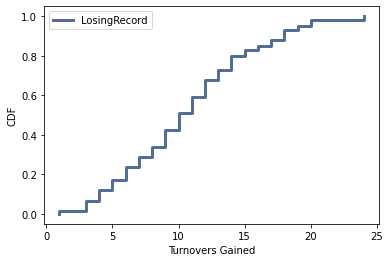

<Figure size 576x432 with 0 Axes>

In [66]:
cdf = thinkstats2.Cdf(LosingRecord.TurnoversGain, label='LosingRecord')

thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='Turnovers Gained', ylabel='CDF')

### Summary

By creating two CDFs that compare the wins for under the mean of penalty yards per game and over the mean for penalty yards per game we can conclude that being under the mean helps win football games.

## Analytical Distribution

In [29]:
# probability plot

def MakeNormalPlot(TurnoversGain):
    mean = WinningRecord.TurnoversGain.mean()
    std = WinningRecord.TurnoversGain.std()
    
    xs = [-4,4]
    fxs, fys = thinkstats2.FitLine(xs, inter=mean, slope=std)
    thinkplot.Plot(fxs, fys, color='gray', label='model')
    
    xs, ys = thinkstats2.NormalProbability(WinningRecord.TurnoversGain)
    thinkplot.Plot(xs, ys, label='Turnovers')

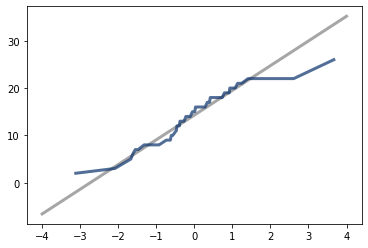

In [30]:
MakeNormalPlot(WinningRecord.TurnoversGain)

In [31]:
def MakeLogNormalPlot(TurnoversGain):
    mean = WinningRecord.TurnoversGain.mean()
    std = WinningRecord.TurnoversGain.std()
    
    xs = [-4,4]
    fxs, fys = thinkstats2.FitLine(xs, inter=mean, slope=std)
    thinkplot.Plot(fxs, fys, color='gray', label='model', scaley='log')
    
    xs, ys = thinkstats2.NormalProbability(WinningRecord.TurnoversGain)
    thinkplot.Plot(xs, ys, label='Turnovers', scaley='log')

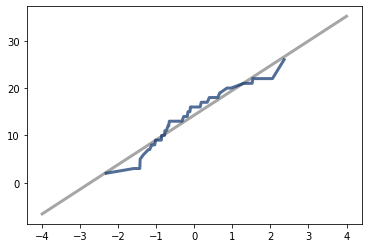

In [32]:
MakeLogNormalPlot(WinningRecord.TurnoversGain)

The log scale seems to fit this data little bit better even though we still see a tail for the WinningRecord Teams Turnovers. The Fit Line fits the data well in this case. Using the LogScale best fit line we can begin to calculate how many turnovers gained in a season will help you increase your win totals. As this is information for teams with winning records it is comparing the best teams.

## Scatter Plots

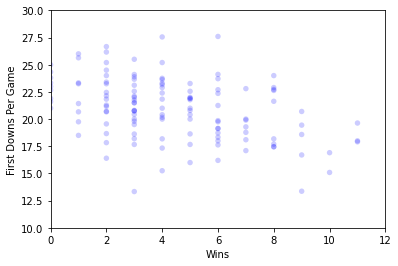

<Figure size 576x432 with 0 Axes>

In [75]:
thinkplot.Scatter(cfb2020.Win, cfb2020.FirstDownPerGame)
thinkplot.Show(xlabel='Wins', ylabel='First Downs Per Game', axis=[0, 12, 10, 30])

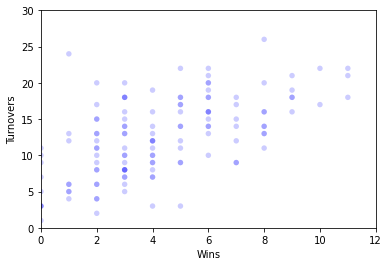

<Figure size 576x432 with 0 Axes>

In [34]:
thinkplot.Scatter(cfb2020.Win, cfb2020.TurnoversGain)
thinkplot.Show(xlabel='Wins', ylabel='Turnovers', axis=[0, 12, 0, 30])

In [35]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [36]:
Cov(cfb2020.Win, cfb2020.PenaltyYardsPerGame)

3.1927292454584904

In [37]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [38]:
Corr(cfb2020.Win, cfb2020.PenaltyYardsPerGame)

0.09569583077400552

In [39]:
Cov(cfb2020.Win, cfb2020.TurnoversGain)

8.646165292330585

In [40]:
Corr(cfb2020.Win, cfb2020.TurnoversGain)

0.5938618266000544

In [41]:
Cov(cfb2020.Win, cfb2020.FirstDownPerGame)

-3.1312290486774335

In [42]:
Corr(cfb2020.Win, cfb2020.FirstDownPerGame)

-0.414590692381488

In [58]:
Corr(cfb2020.Loss, cfb2020.TurnoversLost)

0.5570353215162646

## Hypothesis Testing

In [43]:
class HypothesisTest(object):
    
    def __init__(self, data):
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)
        
    def PValue(self, iters=1000):
        self.test_stat = [self.TestStatistic(self.RunModel())
                          for _ in range(iters)]
        
        count = sum(1 for x in self.test_stat if x >= self.actual)
        return count / iters
    
    def TestStatistic(self, data):
        raise UnimplementedMethodException()
        
    def MakeModel(self):
        pass
    
    def RunModel(self):
        raise UnimplementedMethodExecption()

In [44]:
class DiffMeansPermute(HypothesisTest):
    
    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean()-group2.mean())
        return test_stat
    
    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))
        
    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [45]:
data = WinningRecord.PenaltyYardsPerGame.values, LosingRecord.PenaltyYardsPerGame.values
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
print(pvalue)

0.07


Based on our P-Value calculation between winning teams and losing teams penalty yards per game, we fail to reject the hypothesis that losing teams tend to lose because of penalties they commit during a game. A p-value of greater than 0.05 suggests that our null hypothesis is correct.

## Regression Analysis

In [46]:
diff_FDPerGame = WinningRecord.FirstDownPerGame.mean() - LosingRecord.FirstDownPerGame.mean()
diff_FDPerGame

-2.4305715526303793

In [47]:
diff_OppFDPerGame = WinningRecord.OppFirstDownPerGame.mean() - LosingRecord.OppFirstDownPerGame.mean()
diff_OppFDPerGame

-2.4305715526303793

In [48]:
diff_PenPerGame = WinningRecord.PenaltyYardsPerGame.mean() - LosingRecord.PenaltyYardsPerGame.mean()
diff_PenPerGame

3.8586615154536332

In [49]:
diff_TurnoversGain = WinningRecord.TurnoversGain.mean() - LosingRecord.TurnoversGain.mean()
diff_TurnoversGain

3.6500498504486547

In [50]:
diff_TurnoversLost = WinningRecord.TurnoversLost.mean() - LosingRecord.TurnoversLost.mean()
diff_TurnoversLost

-2.7524925224327017

In [51]:
results = smf.ols('Win ~ FirstDownPerGame', data=cfb2020).fit()
slope = results.params['FirstDownPerGame']

In [52]:
slope * diff_FDPerGame

0.9680056636943482

In [53]:
formula = 'Win ~ FirstDownPerGame'
results = smf.ols(formula, data=cfb2020).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Win   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     25.95
Date:                Wed, 02 Jun 2021   Prob (F-statistic):           1.26e-06
Time:                        18:30:32   Log-Likelihood:                -294.07
No. Observations:                 127   AIC:                             592.1
Df Residuals:                     125   BIC:                             597.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           12.6631      1.654      7.658      0.000       9.391      15.936
FirstDownPerGame    -0.3983      0.078     -5.094      0.000      -0.553      -0.244
==============================================================================
Omnibus:                        4.214   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.122   Jarque-Bera (JB):                3.585
Skew:                           0.316   Prob(JB):                        0.167
Kurtosis:                       2.472   Cond. No.                         160.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
formula = 'Loss ~ OppFirstDownPerGame'
results = smf.ols(formula, data=cfb2020).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Loss   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     31.08
Date:                Wed, 02 Jun 2021   Prob (F-statistic):           1.45e-07
Time:                        18:30:32   Log-Likelihood:                -272.98
No. Observations:                 127   AIC:                             550.0
Df Residuals:                     125   BIC:                             555.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -3.6763      1.401     -2.625      0.010      -6.448      -0.904
OppFirstDownPerGame     0.3692      0.066      5.575      0.000       0.238       0.500
==============================================================================
Omnibus:                        4.346   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.114   Jarque-Bera (JB):                3.029
Skew:                           0.220   Prob(JB):                        0.220
Kurtosis:                       2.384   Cond. No.                         160.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
formula = 'Loss ~ PenaltyYardsPerGame'
results = smf.ols(formula, data=cfb2020).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Loss   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.398
Date:                Wed, 02 Jun 2021   Prob (F-statistic):              0.239
Time:                        18:30:32   Log-Likelihood:                -286.37
No. Observations:                 127   AIC:                             576.7
Df Residuals:                     125   BIC:                             582.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.1173      0.915      5.590      0.000       3.306       6.929
PenaltyYardsPerGame    -0.0197      0.017     -1.182      0.239      -0.053       0.013
==============================================================================
Omnibus:                        2.633   Durbin-Watson:                   1.784
Prob(Omnibus):                  0.268   Jarque-Bera (JB):                2.671
Skew:                           0.327   Prob(JB):                        0.263
Kurtosis:                       2.722   Cond. No.                         244.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
formula = 'Win ~ TurnoversGain'
results = smf.ols(formula, data=cfb2020).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Win   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     68.10
Date:                Wed, 02 Jun 2021   Prob (F-statistic):           1.85e-13
Time:                        18:30:32   Log-Likelihood:                -278.43
No. Observations:                 127   AIC:                             560.9
Df Residuals:                     125   BIC:                             566.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.5867      0.492      1.193      0.235      -0.386       1.560
TurnoversGain     0.2959      0.036      8.252      0.000       0.225       0.367
==============================================================================
Omnibus:                        0.054   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.973   Jarque-Bera (JB):                0.141
Skew:                           0.047   Prob(JB):                        0.932
Kurtosis:                       2.866   Cond. No.                         34.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
formula = 'Loss ~ TurnoversLost'
results = smf.ols(formula, data=cfb2020).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Loss   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     56.24
Date:                Wed, 02 Jun 2021   Prob (F-statistic):           1.04e-11
Time:                        18:30:32   Log-Likelihood:                -263.49
No. Observations:                 127   AIC:                             531.0
Df Residuals:                     125   BIC:                             536.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.0501      0.437      2.402      0.018       0.185       1.915
TurnoversLost     0.2445      0.033      7.499      0.000       0.180       0.309
==============================================================================
Omnibus:                        1.327   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.515   Jarque-Bera (JB):                1.318
Skew:                           0.149   Prob(JB):                        0.517
Kurtosis:                       2.599   Cond. No.                         34.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
formula = 'Win ~ TurnoversGain + PenaltyYardsPerGame + FirstDownPerGame + OppFirstDownPerGame'
results = smf.ols(formula, data=cfb2020).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Win   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     41.50
Date:                Fri, 04 Jun 2021   Prob (F-statistic):           1.34e-18
Time:                        10:09:57   Log-Likelihood:                -261.64
No. Observations:                 127   AIC:                             531.3
Df Residuals:                     123   BIC:                             542.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               7.0878      1.470      4.820      0.000       4.177       9.998
TurnoversGain           0.2748      0.032      8.621      0.000       0.212       0.338
PenaltyYardsPerGame     0.0305      0.014      2.166      0.032       0.003       0.058
FirstDownPerGame       -0.1877      0.031     -6.011      0.000      -0.250      -0.126
OppFirstDownPerGame    -0.1877      0.031     -6.011      0.000      -0.250      -0.126
==============================================================================
Omnibus:                        0.908   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.635   Jarque-Bera (JB):                1.008
Skew:                           0.186   Prob(JB):                        0.604
Kurtosis:                       2.770   Cond. No.                     6.61e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.17e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""